In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
train_df = pd.read_csv('hacr_train.csv')
test_df = pd.read_csv('hacr_test.csv')

In [18]:
train_df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,9020,WALKING_UPSTAIRS,0.330,-0.00449,-0.0481,-0.395,-0.152,-0.196,-0.483,-0.131,...,0.395,-0.26000,-0.526,-0.03420,-0.633,-0.1710,0.6540,-0.556,0.294,0.2570
1,2646,WALKING,0.208,0.00554,-0.1150,-0.432,-0.122,-0.431,-0.470,-0.114,...,-0.119,0.11200,-0.171,0.72500,0.388,0.9420,-0.5880,-0.742,0.264,-0.0505
2,5516,SITTING,-0.413,0.25300,0.2230,-0.779,-0.569,-0.699,-0.797,-0.572,...,-0.268,-0.60800,-0.891,0.08430,0.917,-0.0414,0.0721,-0.434,-0.143,-0.2920
3,5499,STANDING,0.272,-0.02600,-0.1030,-0.997,-0.982,-0.983,-0.998,-0.981,...,0.354,-0.73500,-0.926,0.05260,0.121,-0.3380,0.2900,-0.854,0.170,-0.0555
4,4689,WALKING_UPSTAIRS,0.275,-0.03840,-0.0556,0.126,0.102,-0.044,0.104,0.101,...,0.430,-0.00277,-0.263,0.00825,-0.854,0.7730,-0.8300,-0.621,0.325,0.1480


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 12.4+ MB


In [20]:
train_df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,...,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000
mean,5169.121579,0.274074,-0.017431,-0.108444,-0.606588,-0.502626,-0.609094,-0.633085,-0.518159,-0.610802,...,0.128051,-0.297836,-0.616600,0.006977,0.010181,0.022609,-0.013080,-0.502825,0.061678,-0.045711
std,2965.237845,0.064050,0.045465,0.057296,0.438564,0.502520,0.402961,0.412450,0.486098,0.398058,...,0.240805,0.319959,0.312446,0.330690,0.450463,0.613873,0.491279,0.504476,0.310989,0.260306
min,7.000000,-0.521000,-1.000000,-0.575000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.963000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.970000
25%,2606.000000,0.262000,-0.025400,-0.122000,-0.992000,-0.976000,-0.978000,-0.993000,-0.976000,-0.978000,...,-0.017200,-0.532000,-0.835500,-0.118000,-0.282500,-0.484000,-0.400000,-0.816000,0.001375,-0.117000
50%,5154.000000,0.277000,-0.017300,-0.109000,-0.937000,-0.809000,-0.834000,-0.944000,-0.812000,-0.831000,...,0.131000,-0.341000,-0.706000,0.007220,0.010700,0.021000,-0.015600,-0.717000,0.184000,-0.003100
75%,7731.000000,0.288000,-0.010900,-0.097650,-0.254500,-0.047300,-0.280500,-0.306000,-0.079400,-0.284500,...,0.286000,-0.117500,-0.496000,0.141500,0.313500,0.549500,0.371500,-0.529500,0.253000,0.107000
max,10281.000000,0.633000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.982000,0.977000,0.999000,0.998000


In [21]:
train_df.isna().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [22]:
train_df.drop('rn', axis = 1, inplace = True)

In [23]:
train_df.skew()

tBodyAcc.mean.X                       -2.612291
tBodyAcc.mean.Y                       -0.441342
tBodyAcc.mean.Z                        5.041635
tBodyAcc.std.X                         0.633859
tBodyAcc.std.Y                         0.419878
                                         ...   
angle.tBodyGyroMean.gravityMean       -0.039318
angle.tBodyGyroJerkMean.gravityMean    0.030671
angle.X.gravityMean                    1.465502
angle.Y.gravityMean                   -1.469257
angle.Z.gravityMean                   -0.855117
Length: 561, dtype: float64

In [24]:
train_df['activity'].value_counts()

STANDING              550
LAYING                529
SITTING               491
WALKING               477
WALKING_UPSTAIRS      444
WALKING_DOWNSTAIRS    396
Name: activity, dtype: int64

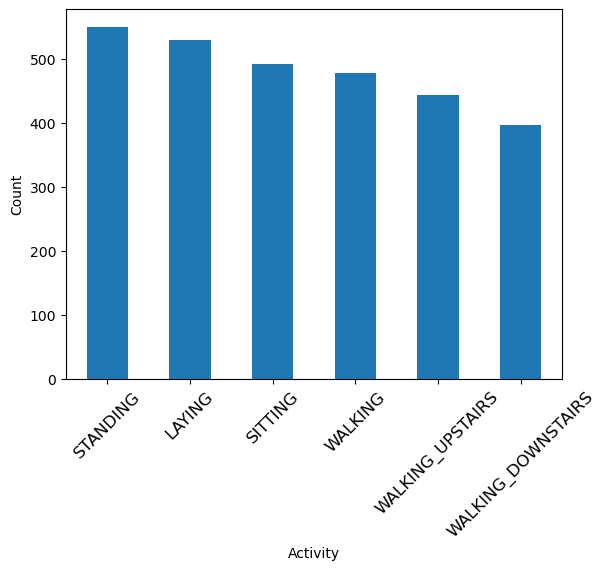

In [25]:
train_df['activity'].value_counts().plot.bar()
plt.xlabel('Activity')
plt.xticks(rotation = 45, size=12)
plt.ylabel('Count')
plt.show()

In [11]:
train_df['activity'] = train_df['activity'].map({'STANDING':0, 'LAYING' :1, 'SITTING':2, 'WALKING':3,
                                                 
                                                 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})

In [26]:
train_df.head()

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,WALKING_UPSTAIRS,0.330,-0.00449,-0.0481,-0.395,-0.152,-0.196,-0.483,-0.131,-0.1970,...,0.395,-0.26000,-0.526,-0.03420,-0.633,-0.1710,0.6540,-0.556,0.294,0.2570
1,WALKING,0.208,0.00554,-0.1150,-0.432,-0.122,-0.431,-0.470,-0.114,-0.4300,...,-0.119,0.11200,-0.171,0.72500,0.388,0.9420,-0.5880,-0.742,0.264,-0.0505
2,SITTING,-0.413,0.25300,0.2230,-0.779,-0.569,-0.699,-0.797,-0.572,-0.6840,...,-0.268,-0.60800,-0.891,0.08430,0.917,-0.0414,0.0721,-0.434,-0.143,-0.2920
3,STANDING,0.272,-0.02600,-0.1030,-0.997,-0.982,-0.983,-0.998,-0.981,-0.9830,...,0.354,-0.73500,-0.926,0.05260,0.121,-0.3380,0.2900,-0.854,0.170,-0.0555
4,WALKING_UPSTAIRS,0.275,-0.03840,-0.0556,0.126,0.102,-0.044,0.104,0.101,-0.0532,...,0.430,-0.00277,-0.263,0.00825,-0.854,0.7730,-0.8300,-0.621,0.325,0.1480


# Train-Test Split :

In [27]:
x = train_df.drop('activity', axis = 1)
y = train_df['activity']

In [28]:
x

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.330,-0.00449,-0.0481,-0.395,-0.1520,-0.196,-0.48300,-0.1310,-0.1970,-0.0627,...,0.395,-0.26000,-0.526,-0.03420,-0.6330,-0.1710,0.6540,-0.556,0.294,0.2570
1,0.208,0.00554,-0.1150,-0.432,-0.1220,-0.431,-0.47000,-0.1140,-0.4300,-0.1800,...,-0.119,0.11200,-0.171,0.72500,0.3880,0.9420,-0.5880,-0.742,0.264,-0.0505
2,-0.413,0.25300,0.2230,-0.779,-0.5690,-0.699,-0.79700,-0.5720,-0.6840,-0.9740,...,-0.268,-0.60800,-0.891,0.08430,0.9170,-0.0414,0.0721,-0.434,-0.143,-0.2920
3,0.272,-0.02600,-0.1030,-0.997,-0.9820,-0.983,-0.99800,-0.9810,-0.9830,-0.9450,...,0.354,-0.73500,-0.926,0.05260,0.1210,-0.3380,0.2900,-0.854,0.170,-0.0555
4,0.275,-0.03840,-0.0556,0.126,0.1020,-0.044,0.10400,0.1010,-0.0532,0.2120,...,0.430,-0.00277,-0.263,0.00825,-0.8540,0.7730,-0.8300,-0.621,0.325,0.1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,0.284,-0.01830,-0.1140,-0.995,-0.9940,-0.992,-0.99600,-0.9940,-0.9910,-0.9350,...,0.185,-0.73700,-0.922,0.26100,-0.6070,0.1620,-0.5750,0.562,-0.856,-0.1350
2883,0.272,-0.01430,-0.1030,-0.997,-0.9930,-0.990,-0.99700,-0.9940,-0.9900,-0.9430,...,0.387,-0.68300,-0.876,-0.01870,0.2190,-0.0772,0.0550,-0.479,-0.228,-0.1360
2884,0.281,-0.01950,-0.1140,-0.997,-0.9940,-0.989,-0.99700,-0.9930,-0.9890,-0.9410,...,0.593,-0.54500,-0.825,-0.14000,-0.0298,-0.4930,0.4640,-0.853,0.137,-0.0811
2885,0.274,-0.02240,-0.1150,-0.973,-0.6490,-0.836,-0.98000,-0.6570,-0.8400,-0.9210,...,-0.371,-0.43600,-0.825,0.17500,-0.0212,-0.7940,0.7960,-0.839,0.113,-0.0988


In [29]:
y

0         WALKING_UPSTAIRS
1                  WALKING
2                  SITTING
3                 STANDING
4         WALKING_UPSTAIRS
               ...        
2882                LAYING
2883               SITTING
2884               SITTING
2885              STANDING
2886    WALKING_DOWNSTAIRS
Name: activity, Length: 2887, dtype: object

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2309, 561)
(578, 561)
(2309,)
(578,)


In [32]:
#using MinMaxScaler :
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [33]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression :

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [38]:
acc_log = log_reg.score(x_train, y_train)
acc_log

0.989172802078822

In [39]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

# Model Evaluation :

In [40]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [41]:
print('                    Training Report           ')
modelEval(y_train, y_pred_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 385  12   0   0   0]
 [  0  10 438   0   0   0]
 [  0   0   0 387   0   1]
 [  0   0   0   0 301   1]
 [  0   0   0   1   0 355]]
The accuracy of the Model is : 0.989172802078822
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       0.97      0.97      0.97       397
          STANDING       0.97      0.98      0.98       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      1.00      1.00       302
  WALKING_UPSTAIRS       0.99      1.00      1.00       356

          accuracy                           0.99      2309
         macro avg       0.99      0.99      0.99      2309
      weighted avg       0.99      0.99      0.99      2309



In [42]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  83  10   0   0   1]
 [  0   4  98   0   0   0]
 [  0   0   0  89   0   0]
 [  0   0   0   0  94   0]
 [  0   0   0   1   1  86]]
The accuracy of the Model is : 0.9705882352941176
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.95      0.88      0.92        94
          STANDING       0.91      0.96      0.93       102
           WALKING       0.99      1.00      0.99        89
WALKING_DOWNSTAIRS       0.99      1.00      0.99        94
  WALKING_UPSTAIRS       0.99      0.98      0.98        88

          accuracy                           0.97       578
         macro avg       0.97      0.97      0.97       578
      weighted avg       0.97      0.97      0.97       578



# DecisionTree Classifier :

In [43]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
acc_tree = tree.score(x_train, y_train)
acc_tree

1.0

In [46]:
y_pred_tree_train = tree.predict(x_train)
y_pred_tree_test = tree.predict(x_test)

# Model Evaluation :

In [47]:
print('                    Training Report           ')
modelEval(y_train, y_pred_tree_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 397   0   0   0   0]
 [  0   0 448   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   0 302   0]
 [  0   0   0   0   0 356]]
The accuracy of the Model is : 1.0
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       1.00      1.00      1.00       397
          STANDING       1.00      1.00      1.00       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      1.00      1.00       302
  WALKING_UPSTAIRS       1.00      1.00      1.00       356

          accuracy                           1.00      2309
         macro avg       1.00      1.00      1.00      2309
      weighted avg       1.00      1.00      1.00      2309



In [48]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_tree_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  80  14   0   0   0]
 [  0  13  89   0   0   0]
 [  0   0   0  81   6   2]
 [  0   0   0   0  90   4]
 [  0   0   1   4   7  76]]
The accuracy of the Model is : 0.9117647058823529
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.86      0.85      0.86        94
          STANDING       0.86      0.87      0.86       102
           WALKING       0.95      0.91      0.93        89
WALKING_DOWNSTAIRS       0.87      0.96      0.91        94
  WALKING_UPSTAIRS       0.93      0.86      0.89        88

          accuracy                           0.91       578
         macro avg       0.91      0.91      0.91       578
      weighted avg       0.91      0.91      0.91       578



# AdaBoost Classifier :

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [53]:
acc_ada = ada_class.score(x_train, y_train)
acc_ada

1.0

In [54]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

# Model Evaluation :

In [55]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 397   0   0   0   0]
 [  0   0 448   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   0 302   0]
 [  0   0   0   0   0 356]]
The accuracy of the Model is : 1.0
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       1.00      1.00      1.00       397
          STANDING       1.00      1.00      1.00       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      1.00      1.00       302
  WALKING_UPSTAIRS       1.00      1.00      1.00       356

          accuracy                           1.00      2309
         macro avg       1.00      1.00      1.00      2309
      weighted avg       1.00      1.00      1.00      2309



In [56]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  81  13   0   0   0]
 [  0  15  87   0   0   0]
 [  0   0   0  82   7   0]
 [  0   0   0   3  88   3]
 [  0   0   0   7   7  74]]
The accuracy of the Model is : 0.9048442906574394
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.84      0.86      0.85        94
          STANDING       0.87      0.85      0.86       102
           WALKING       0.89      0.92      0.91        89
WALKING_DOWNSTAIRS       0.86      0.94      0.90        94
  WALKING_UPSTAIRS       0.96      0.84      0.90        88

          accuracy                           0.90       578
         macro avg       0.90      0.90      0.90       578
      weighted avg       0.91      0.90      0.90       578



# RandomForest Classifier :

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
acc_randForest = clf_randF.score(x_train, y_train)
acc_randForest

1.0

In [58]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

# Model Evaluation :

In [59]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 397   0   0   0   0]
 [  0   0 448   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   0 302   0]
 [  0   0   0   0   0 356]]
The accuracy of the Model is : 1.0
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       1.00      1.00      1.00       397
          STANDING       1.00      1.00      1.00       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      1.00      1.00       302
  WALKING_UPSTAIRS       1.00      1.00      1.00       356

          accuracy                           1.00      2309
         macro avg       1.00      1.00      1.00      2309
      weighted avg       1.00      1.00      1.00      2309



In [60]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  85   9   0   0   0]
 [  0   3  99   0   0   0]
 [  0   0   0  87   2   0]
 [  0   0   0   1  90   3]
 [  0   0   0   0   1  87]]
The accuracy of the Model is : 0.967128027681661
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.97      0.90      0.93        94
          STANDING       0.92      0.97      0.94       102
           WALKING       0.99      0.98      0.98        89
WALKING_DOWNSTAIRS       0.97      0.96      0.96        94
  WALKING_UPSTAIRS       0.97      0.99      0.98        88

          accuracy                           0.97       578
         macro avg       0.97      0.97      0.97       578
      weighted avg       0.97      0.97      0.97       578



# Hyperparameter tuning using Bagging classifier (RandomForest) :

In [66]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [67]:
acc_bag = bag_clf.score(x_train, y_train)
acc_bag

0.9982676483326115

In [68]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [69]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 396   1   0   0   0]
 [  0   0 448   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   0 299   3]
 [  0   0   0   0   0 356]]
The accuracy of the Model is : 0.9982676483326115
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       1.00      1.00      1.00       397
          STANDING       1.00      1.00      1.00       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      0.99      1.00       302
  WALKING_UPSTAIRS       0.99      1.00      1.00       356

          accuracy                           1.00      2309
         macro avg       1.00      1.00      1.00      2309
      weighted avg       1.00      1.00      1.00      2309



In [70]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  87   7   0   0   0]
 [  0   4  98   0   0   0]
 [  0   0   0  87   2   0]
 [  0   0   0   1  88   5]
 [  0   0   0   0   1  87]]
The accuracy of the Model is : 0.9653979238754326
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.96      0.93      0.94        94
          STANDING       0.93      0.96      0.95       102
           WALKING       0.99      0.98      0.98        89
WALKING_DOWNSTAIRS       0.97      0.94      0.95        94
  WALKING_UPSTAIRS       0.95      0.99      0.97        88

          accuracy                           0.97       578
         macro avg       0.97      0.96      0.96       578
      weighted avg       0.97      0.97      0.97       578



# GradientBoostingClassifier :

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [75]:
acc_grad = gb_clf.score(x_train, y_train)
acc_grad

1.0

In [76]:
y_pred_grad_train = gb_clf.predict(x_train)
y_pred_grad_test = gb_clf.predict(x_test)

# Model Evaluation :

In [77]:
print('                    Training Report           ')
modelEval(y_train, y_pred_grad_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 397   0   0   0   0]
 [  0   0 448   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   0 302   0]
 [  0   0   0   0   0 356]]
The accuracy of the Model is : 1.0
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       1.00      1.00      1.00       397
          STANDING       1.00      1.00      1.00       448
           WALKING       1.00      1.00      1.00       388
WALKING_DOWNSTAIRS       1.00      1.00      1.00       302
  WALKING_UPSTAIRS       1.00      1.00      1.00       356

          accuracy                           1.00      2309
         macro avg       1.00      1.00      1.00      2309
      weighted avg       1.00      1.00      1.00      2309



In [78]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_grad_test)

               Testing Report                            
[[111   0   0   0   0   0]
 [  0  86   7   0   0   1]
 [  0   2 100   0   0   0]
 [  0   1   0  87   1   0]
 [  0   0   0   1  92   1]
 [  0   0   0   0   1  87]]
The accuracy of the Model is : 0.9740484429065744
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       111
           SITTING       0.97      0.91      0.94        94
          STANDING       0.93      0.98      0.96       102
           WALKING       0.99      0.98      0.98        89
WALKING_DOWNSTAIRS       0.98      0.98      0.98        94
  WALKING_UPSTAIRS       0.98      0.99      0.98        88

          accuracy                           0.97       578
         macro avg       0.97      0.97      0.97       578
      weighted avg       0.97      0.97      0.97       578



# KNeighborsClassifier :

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [89]:
acc_knn = knn.score(x_train, y_train)
acc_knn

0.9653529666522304

In [90]:
y_pred_kn_train = knn.predict(x_train)
y_pred_kn_test = knn.predict(x_test)

# Model Evaluation :

In [91]:
print('                    Training Report           ')
modelEval(y_train, y_pred_kn_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  0 343  52   0   0   2]
 [  0  13 435   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   7 291   4]
 [  0   0   0   0   2 354]]
The accuracy of the Model is : 0.9653529666522304
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       0.96      0.86      0.91       397
          STANDING       0.89      0.97      0.93       448
           WALKING       0.98      1.00      0.99       388
WALKING_DOWNSTAIRS       0.99      0.96      0.98       302
  WALKING_UPSTAIRS       0.98      0.99      0.99       356

          accuracy                           0.97      2309
         macro avg       0.97      0.97      0.97      2309
      weighted avg       0.97      0.97      0.97      2309



In [92]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_kn_test)

               Testing Report                            
[[110   1   0   0   0   0]
 [  0  72  21   0   0   1]
 [  0   8  94   0   0   0]
 [  0   0   0  89   0   0]
 [  0   0   0   2  91   1]
 [  0   0   0   1   1  86]]
The accuracy of the Model is : 0.9377162629757786
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       111
           SITTING       0.89      0.77      0.82        94
          STANDING       0.82      0.92      0.87       102
           WALKING       0.97      1.00      0.98        89
WALKING_DOWNSTAIRS       0.99      0.97      0.98        94
  WALKING_UPSTAIRS       0.98      0.98      0.98        88

          accuracy                           0.94       578
         macro avg       0.94      0.94      0.94       578
      weighted avg       0.94      0.94      0.94       578



# Best k value using Elbow method :

In [93]:
error = []

for i in range(1, 40):
    kn_elbow = KNeighborsClassifier(n_neighbors = i)
    kn_elbow.fit(x_train, y_train)
    pred_i = kn_elbow.predict(x_test)
    error.append(np.mean(pred_i != y_test))

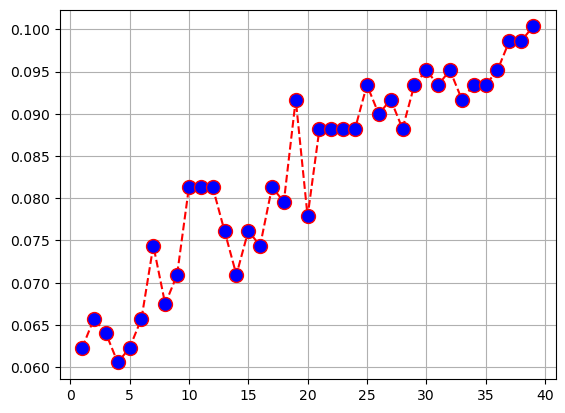

In [94]:
plt.plot(range(1,40), error, color = 'red', linestyle= 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.grid(True)
plt.show()

In [101]:
knn_elbow = KNeighborsClassifier(n_neighbors = 3)

knn_elbow.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
acc_kn_elbow = knn_elbow.score(x_train, y_train)
acc_kn_elbow

0.9792117799913382

In [103]:
y_pred_clfkn_train = knn_elbow.predict(x_train)
y_pred_clfkn_test = knn_elbow.predict(x_test)

# Model Evaluation :

In [104]:
print('                    Training Report           ')
modelEval(y_train, y_pred_clfkn_train)

                    Training Report           
[[418   0   0   0   0   0]
 [  1 375  21   0   0   0]
 [  0  17 431   0   0   0]
 [  0   0   0 388   0   0]
 [  0   0   0   6 294   2]
 [  0   0   0   0   1 355]]
The accuracy of the Model is : 0.9792117799913382
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       418
           SITTING       0.96      0.94      0.95       397
          STANDING       0.95      0.96      0.96       448
           WALKING       0.98      1.00      0.99       388
WALKING_DOWNSTAIRS       1.00      0.97      0.98       302
  WALKING_UPSTAIRS       0.99      1.00      1.00       356

          accuracy                           0.98      2309
         macro avg       0.98      0.98      0.98      2309
      weighted avg       0.98      0.98      0.98      2309



In [105]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_clfkn_test)

               Testing Report                            
[[110   1   0   0   0   0]
 [  0  71  22   0   0   1]
 [  0   7  95   0   0   0]
 [  0   0   0  89   0   0]
 [  0   0   0   3  89   2]
 [  0   0   0   1   0  87]]
The accuracy of the Model is : 0.9359861591695502
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       111
           SITTING       0.90      0.76      0.82        94
          STANDING       0.81      0.93      0.87       102
           WALKING       0.96      1.00      0.98        89
WALKING_DOWNSTAIRS       1.00      0.95      0.97        94
  WALKING_UPSTAIRS       0.97      0.99      0.98        88

          accuracy                           0.94       578
         macro avg       0.94      0.94      0.94       578
      weighted avg       0.94      0.94      0.94       578



In [126]:
models = pd.DataFrame({ 'Model': ['RandomForestClassifier', 'BaggingClassifier', 'DecisionTree Classifier',
                                 'GradientBoosting Classifier', 'Logistic Regression', 'KNNeighbors','KNNeighbors Classifier',
                                 'AdaBoost Classifier'],
                      'Score': [acc_randForest, acc_bag, acc_tree, acc_log, acc_knn,acc_kn_elbow, acc_grad, acc_ada]})
models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,RandomForestClassifier,1.000000
1,DecisionTree Classifier,1.000000
2,KNNeighbors Classifier,1.000000
3,AdaBoost Classifier,1.000000
4,BaggingClassifier,0.998268
5,GradientBoosting Classifier,0.989173
6,KNNeighbors,0.979212
7,Logistic Regression,0.965353


In [135]:
test_df = pd.read_csv('hacr_test.csv')

In [136]:
test_df.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,811,0.359,0.01100,-0.104,0.0775,0.160,-0.3870,0.024,0.0301,-0.3800,...,-0.0731,0.1970,-0.154,-0.5350,-0.694,0.946,-0.1450,-0.980,0.101,0.00253
1,8965,0.278,-0.00464,-0.133,-0.2850,0.152,0.0195,-0.322,0.1510,0.0299,...,0.1220,0.0985,-0.178,-0.0400,0.293,0.691,0.6740,-0.624,0.265,0.22200
2,5000,0.230,-0.05000,-0.128,-0.1650,-0.126,0.2030,-0.194,-0.2510,0.2240,...,0.3230,-0.1920,-0.525,0.2050,-0.803,0.969,-0.1210,-0.790,0.183,0.14100
3,1200,0.276,-0.01320,-0.110,-0.9840,-0.933,-0.9460,-0.986,-0.9370,-0.9460,...,0.4310,-0.2730,-0.652,0.1440,-0.159,-0.657,-0.3480,-0.824,0.148,0.13400
4,9812,0.308,-0.01550,-0.123,-0.9760,-0.966,-0.9720,-0.977,-0.9640,-0.9720,...,0.0554,-0.3330,-0.703,0.0338,-0.595,-0.013,0.0487,0.395,-0.629,-0.34100


In [137]:
df_test = test_df

In [138]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Columns: 562 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1)
memory usage: 3.1 MB


In [139]:
test_df.isna().sum()

rn                                     0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 562, dtype: int64

In [140]:
test_df.drop('rn', axis = 1, inplace = True)

In [141]:
test_df = scaler.transform(test_df)

In [142]:
predicted_test = clf_randF.predict(test_df)

In [143]:
predicted_test

array(['WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'STANDING', 'LAYING',
       'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'STANDING', 'LAYING', 'SITTING', 'STANDING', 'WALKING',
       'WALKING_UPSTAIRS', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'STANDING', 'WALKING', 'STANDING', 'STANDING',
       'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'WALKING_DOWNSTAIRS',
       'SITTING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING',
       'WALKING_UPSTAIRS', 'LAYING', 'STANDING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'SITTING', 'LAYING', 'WALKING', 'LAYING',
       'STANDING', 'STANDING', 'WALKING_UPSTAIRS', 'LAYING',
       'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'STANDING', 'SITTING',
       'WALKING', 'STANDING', 'STANDING', 'LAYING', 'LAYING',
       'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING',
       'SITTING', 'LAYING', 'WALKING_DOWNSTAIRS', 'STANDING',
       'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYI

In [144]:
list(zip(y_test, predicted_test))

[('SITTING', 'WALKING_DOWNSTAIRS'),
 ('STANDING', 'WALKING'),
 ('STANDING', 'WALKING'),
 ('LAYING', 'STANDING'),
 ('SITTING', 'LAYING'),
 ('WALKING', 'WALKING_UPSTAIRS'),
 ('STANDING', 'LAYING'),
 ('WALKING', 'WALKING'),
 ('WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'),
 ('LAYING', 'STANDING'),
 ('STANDING', 'LAYING'),
 ('STANDING', 'SITTING'),
 ('WALKING_DOWNSTAIRS', 'STANDING'),
 ('STANDING', 'WALKING'),
 ('LAYING', 'WALKING_UPSTAIRS'),
 ('LAYING', 'SITTING'),
 ('WALKING_DOWNSTAIRS', 'WALKING'),
 ('WALKING', 'WALKING_UPSTAIRS'),
 ('STANDING', 'STANDING'),
 ('LAYING', 'WALKING'),
 ('WALKING_DOWNSTAIRS', 'STANDING'),
 ('WALKING', 'STANDING'),
 ('STANDING', 'WALKING_DOWNSTAIRS'),
 ('STANDING', 'LAYING'),
 ('STANDING', 'LAYING'),
 ('WALKING', 'WALKING_DOWNSTAIRS'),
 ('WALKING', 'SITTING'),
 ('WALKING', 'WALKING'),
 ('WALKING_DOWNSTAIRS', 'LAYING'),
 ('LAYING', 'WALKING_DOWNSTAIRS'),
 ('WALKING_UPSTAIRS', 'WALKING'),
 ('LAYING', 'WALKING_UPSTAIRS'),
 ('SITTING', 'LAYING'),
 ('LAYING', 'STANDIN

In [147]:
df_test['activity'] = predicted_test

In [148]:
df_test.head()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,activity
0,0.359,0.01100,-0.104,0.0775,0.160,-0.3870,0.024,0.0301,-0.3800,0.452,...,0.1970,-0.154,-0.5350,-0.694,0.946,-0.1450,-0.980,0.101,0.00253,WALKING_DOWNSTAIRS
1,0.278,-0.00464,-0.133,-0.2850,0.152,0.0195,-0.322,0.1510,0.0299,-0.170,...,0.0985,-0.178,-0.0400,0.293,0.691,0.6740,-0.624,0.265,0.22200,WALKING
2,0.230,-0.05000,-0.128,-0.1650,-0.126,0.2030,-0.194,-0.2510,0.2240,0.237,...,-0.1920,-0.525,0.2050,-0.803,0.969,-0.1210,-0.790,0.183,0.14100,WALKING
3,0.276,-0.01320,-0.110,-0.9840,-0.933,-0.9460,-0.986,-0.9370,-0.9460,-0.929,...,-0.2730,-0.652,0.1440,-0.159,-0.657,-0.3480,-0.824,0.148,0.13400,STANDING
4,0.308,-0.01550,-0.123,-0.9760,-0.966,-0.9720,-0.977,-0.9640,-0.9720,-0.908,...,-0.3330,-0.703,0.0338,-0.595,-0.013,0.0487,0.395,-0.629,-0.34100,LAYING


In [151]:
df_test.to_csv('submission_activity.csv', index = False, header = False)